# Volatiltiy Skew, Term Structure 

Here's a breakdown of the code:

Import necessary libraries:

numpy and pandas for data manipulation.
yfinance (imported as yf) for fetching stock and options data from Yahoo Finance.
datetime for date and time manipulation.
matplotlib.pyplot for creating plots.

Define a function fetch_option_data(ticker):
This function fetches option chain data for a given stock index represented by its ticker symbol.
Create a Ticker object using yf.Ticker(ticker) to represent the stock index. The Ticker object is used to fetch options data.

Get a list of available expiration dates for options contracts using Ticker.options.

Initialize an empty DataFrame called option_data to store all the option chain data.
Loop through each expiration date:

Fetch the option chain data for the current expiration date using Ticker.option_chain(expiration).
Separate the call and put options data.

Add an "Option Type" column to identify whether it's a call or put option.

Calculate the actual expiration date by adding 23 hours, 59 minutes, and 59 seconds to the expiration date (to account for market closing times).

Concatenate the options data for this expiration date with the option_data DataFrame.
Calculate the "Days to Expiration" by finding the difference between the expiration date and the current date and time. This information is added as a new column to the option_data DataFrame.

Return the option_data DataFrame containing all the fetched options data.

Fetch option data for the NASDAQ index (^NDX) using the fetch_option_data function.

Select call options from the retrieved options data.

Print the available expiration dates for call options.

Choose a specific expiration date ("2023-09-18 23:59:59") for further analysis and select call options that expire on that date.

Filter out call options with low implied volatility (implied volatility >= 0.005).

Set the strike price as the index for better plotting.

Plot the Implied Volatility Skew for the selected expiration date. This chart shows how implied volatility varies with different strike prices.

Select a specific strike price (15250.0) for further analysis and filter out call options with low implied volatility (implied volatility >= 0.001).

Set the expiration date as the index for better plotting.

Plot the Implied Volatility Term Structure for the selected strike price. This chart shows how implied volatility changes across different expiration dates for a specific strike price.

## Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [74]:
def fetch_option_data(ticker):
    """
    Fetch option chain data for a given stock ticker.
    """
    Ticker = yf.Ticker(ticker)
    expirations = Ticker.options
    
    option_data = pd.DataFrame()
    
    for expiration in expirations:
        option_chain = Ticker.option_chain(expiration)
        
        calls = option_chain.calls
        calls['Option Type'] = "Call"
        
        puts = option_chain.puts
        puts['Option Type'] = "Put"
        
        options = pd.concat([calls, puts])
        options['Expiration Date'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)
        
        option_data = pd.concat([option_data, options])
    
    option_data["Days to Expiration"] = (option_data['Expiration Date'] - dt.datetime.today()).dt.days + 1
    
    return option_data

In [3]:
# Fetch option data for NASDAQ
options_data = fetch_option_data("^NDX")

In [4]:
# Select call options
call_options = options_data[options_data["Option Type"] == "Call"]

In [36]:
# Print available expiration dates
print("Available Expiration Dates:")
print(set(call_options['Expiration Date']))

Available Expiration Dates:
{Timestamp('2023-12-15 23:59:59'), Timestamp('2024-06-28 23:59:59'), Timestamp('2023-09-21 23:59:59'), Timestamp('2023-10-02 23:59:59'), Timestamp('2023-10-20 23:59:59'), Timestamp('2023-09-28 23:59:59'), Timestamp('2024-05-17 23:59:59'), Timestamp('2023-09-25 23:59:59'), Timestamp('2025-12-19 23:59:59'), Timestamp('2023-10-03 23:59:59'), Timestamp('2023-09-27 23:59:59'), Timestamp('2023-12-29 23:59:59'), Timestamp('2024-03-15 23:59:59'), Timestamp('2023-09-29 23:59:59'), Timestamp('2024-12-20 23:59:59'), Timestamp('2023-10-27 23:59:59'), Timestamp('2024-03-28 23:59:59'), Timestamp('2023-09-20 23:59:59'), Timestamp('2023-10-10 23:59:59'), Timestamp('2023-10-11 23:59:59'), Timestamp('2023-10-09 23:59:59'), Timestamp('2023-09-15 23:59:59'), Timestamp('2024-09-20 23:59:59'), Timestamp('2024-01-19 23:59:59'), Timestamp('2024-02-16 23:59:59'), Timestamp('2024-08-16 23:59:59'), Timestamp('2023-10-05 23:59:59'), Timestamp('2024-04-19 23:59:59'), Timestamp('2023-09-

In [13]:
# Select an expiration date to plot
chosen_expiry_date = "2023-09-18 23:59:59"
selected_calls_at_expiry = call_options[call_options["Expiration Date"] == chosen_expiry_date]

In [14]:
# Filter out low implied volatility options
filtered_calls_at_expiry = selected_calls_at_expiry[selected_calls_at_expiry["impliedVolatility"] >= 0.005]

# Set the strike price as the index for better plotting
filtered_calls_at_expiry.set_index("strike", inplace=True)

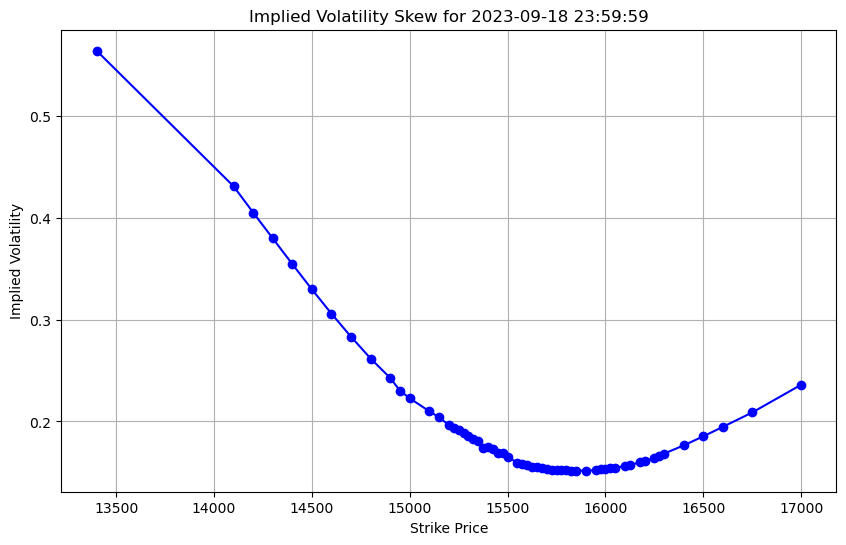

In [16]:
# Plot Implied Volatility Skew
plt.figure(figsize=(10, 6))
plt.plot(filtered_calls_at_expiry.index, filtered_calls_at_expiry["impliedVolatility"], marker='o', linestyle='-', color='b')
plt.title(f"Implied Volatility Skew for {chosen_expiry_date}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)

In [18]:
# Select a specific strike price to plot
selected_strike_price = 15250.0
selected_calls_at_strike = call_options[call_options["strike"] == selected_strike_price]

In [19]:
# Filter out low implied volatility options
filtered_calls_at_strike = selected_calls_at_strike[selected_calls_at_strike["impliedVolatility"] >= 0.001]

In [20]:
# Set the expiration date as the index for better plotting
filtered_calls_at_strike.set_index("Expiration Date", inplace=True)

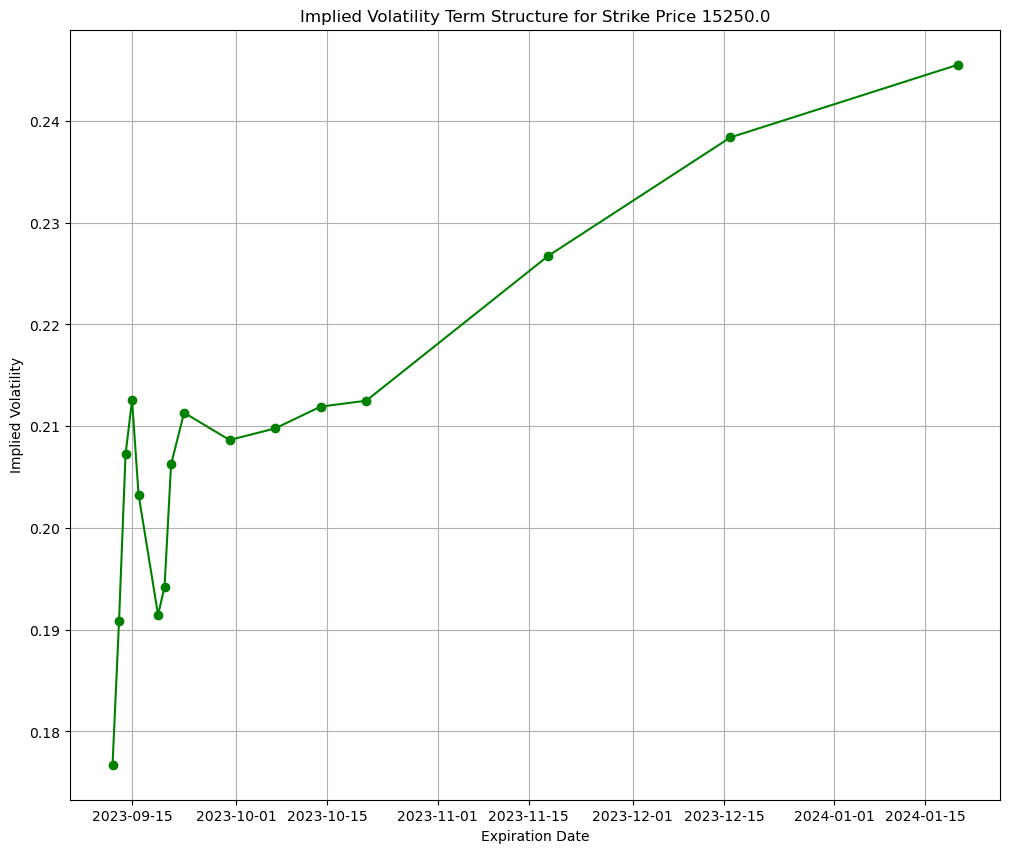

In [31]:
# Plot Implied Volatility Term Structure
plt.figure(figsize=(12, 10))
plt.plot(filtered_calls_at_strike.index, filtered_calls_at_strike["impliedVolatility"], marker='o', linestyle='-', color='g')
plt.title(f"Implied Volatility Term Structure for Strike Price {selected_strike_price}")
plt.xlabel("Expiration Date")
plt.ylabel("Implied Volatility")
plt.grid(True)